In [290]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [291]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
folder_path = "C:/Users/arroy/OneDrive/바탕 화면/2024/지식재산캠프/물류_논문_프로세스CHECK"  # 현재 디렉토리를 사용하려면 폴더 경로를 "."으로 설정
xlsx_files = [file for file in os.listdir(folder_path) if file.endswith(".xlsx")]

dfs = []
for file in xlsx_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    dfs.append(df)

# 하나의 데이터프레임으로 병합
data = pd.concat(dfs, ignore_index=True)

data = pd.DataFrame(data)
data = data[['Abstract', 'Publication Year']]

In [293]:
data

,Abstract,Publication Year
0,The aim of the paper is to analyze the influen...,2015.0
1,"Nowadays, main participants in international c...",2012.0
2,Inspired by the theme of the World Customs Org...,2020.0
3,Transnational security governance initiatives ...,2016.0
4,Purpose - To investigate the practices and val...,2006.0
...,...,...
3260,As the third party logistics partners ( carrie...,2006.0
3261,The location of collection and delivery points...,2021.0
3262,The fast development of transport activities a...,2004.0
3263,Purpose While the understanding of customer sa...,2021.0


In [294]:
data['Abstract'] = data['Abstract'].fillna('')

In [295]:
def remove_non_alphanumeric(text):
    if isinstance(text, str):  # text가 문자열인지 확인
        return re.sub(r'[^a-zA-Z\s]', '', text)
    else:
        return ''

In [296]:
data['Abstract'] = data['Abstract'].apply(remove_non_alphanumeric)

In [297]:
text = data[['Abstract']]

In [298]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [299]:
import nltk
text['Abstract'] = text.apply(lambda row: nltk.word_tokenize(row['Abstract']), axis=1)

C:\Users\arroy\AppData\Local\Temp\ipykernel_28180\3624090061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Abstract'] = text.apply(lambda row: nltk.word_tokenize(row['Abstract']), axis=1)


In [300]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['Abstract'] = text['Abstract'].apply(lambda x: [word for word in x if word not in (stop)])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arroy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\arroy\AppData\Local\Temp\ipykernel_28180\2522911266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Abstract'] = text['Abstract'].apply(lambda x: [word for word in x if word not in (stop)])


In [301]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arroy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arroy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [302]:
from nltk.stem import WordNetLemmatizer
text['Abstract'] = text['Abstract'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head()

C:\Users\arroy\AppData\Local\Temp\ipykernel_28180\1860500123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Abstract'] = text['Abstract'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


,Abstract
0,"[The, aim, paper, analyze, influence, safety, ..."
1,"[Nowadays, main, participants, international, ..."
2,"[Inspired, theme, World, Customs, Organization..."
3,"[Transnational, security, governance, initiati..."
4,"[Purpose, To, investigate, practice, value, vo..."


In [303]:
tokenized_doc = text['Abstract'].apply(lambda x : [word for word in x if len(word) > 3])
tokenized_doc[:5]

0    [paper, analyze, influence, safety, standards,...
1    [Nowadays, main, participants, international, ...
2    [Inspired, theme, World, Customs, Organization...
3    [Transnational, security, governance, initiati...
4    [Purpose, investigate, practice, value, volunt...
Name: Abstract, dtype: object

In [304]:
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['Abstract'] = detokenized_doc
# 다시 text['headline_text'] 에 저장
text.head()

C:\Users\arroy\AppData\Local\Temp\ipykernel_28180\1446585966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Abstract'] = detokenized_doc


,Abstract
0,paper analyze influence safety standards inter...
1,Nowadays main participants international conta...
2,Inspired theme World Customs Organization conc...
3,Transnational security governance initiatives ...
4,Purpose investigate practice value voluntary l...


In [305]:
data['Abstract'] = text['Abstract']

In [311]:
# 텍스트 데이터 전처리 및 LDA 모델링
vectorizer = TfidfVectorizer()
lda = LatentDirichletAllocation(n_components=4, random_state=42)
pipe = make_pipeline(vectorizer, lda)

In [312]:
# 결측치 확인
print(data['Abstract'].isnull().sum())

# 결측치 처리 (예시: 빈 문자열로 대체)
data['Abstract'].fillna('', inplace=True)

0


In [313]:
# 데이터에 대한 전처리 및 모델 학습
processed_texts = data['Abstract']

In [314]:
topic_weights = pipe.fit_transform(processed_texts)

In [315]:
# 토픽 결과를 데이터프레임에 추가
df_topics = pd.DataFrame(topic_weights, columns=[f'Topic_{i+1}' for i in range(4)])

In [320]:
# 작성 년도 컬럼과 토픽 결과 데이터프레임을 합치기
df_combined = pd.concat([df[['Publication Year']], df_topics], axis=1)

# 각 토픽의 연도별 주목도 계산
topic_occurrence_by_year = df_combined.groupby('Publication Year').sum()

In [321]:
# 각 토픽에서의 주요 키워드 출력
feature_names = vectorizer.get_feature_names_out()
for i, topic_weights in enumerate(lda.components_):
    top_keywords_idx = topic_weights.argsort()[:-6:-1]  # 상위 n개의 인덱스
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(f'Topic {i+1}의 주요 키워드: {top_keywords}')

Topic 1의 주요 키워드: ['lateness', 'logifit', 'suburbanization', 'dmsfsc', 'papaya']
Topic 2의 주요 키워드: ['model', 'logistics', 'chain', 'supply', 'cost']
Topic 3의 주요 키워드: ['portcentric', 'derivatives', 'lognet', 'checkin', 'zara']
Topic 4의 주요 키워드: ['wdcs', 'cartons', 'cstores', 'beverages', 'mrlrp']


In [322]:
# 결과 확인
print("각 토픽의 연도별 주목도:")
topic_occurrence_by_year

각 토픽의 연도별 주목도:


,Topic_1,Topic_2,Topic_3,Topic_4
Publication Year,,,,
1997.0,0.032457,0.902620,0.032456,0.032467
1998.0,0.057808,1.826561,0.057808,0.057823
2001.0,0.032216,0.903339,0.032219,0.032225
2002.0,0.026480,0.920556,0.026481,0.026484
2004.0,0.055582,1.833247,0.055584,0.055587
2005.0,0.037975,0.885934,0.037976,0.038115
2006.0,0.033751,0.898764,0.033741,0.033744
2008.0,0.195915,0.736796,0.033640,0.033649
2009.0,0.030654,0.908036,0.030654,0.030655


<AxesSubplot:xlabel='Publication Year', ylabel='Topic_1'>

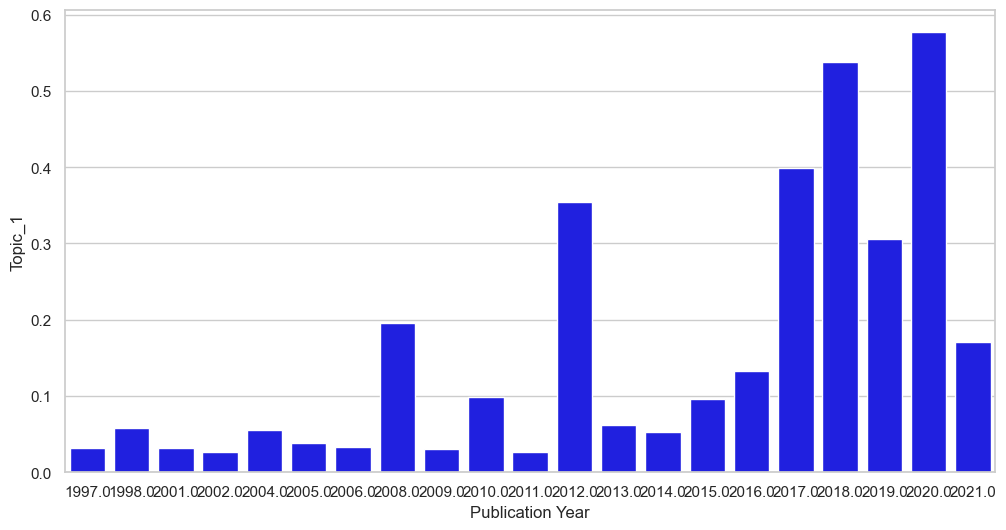

In [323]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_occurrence_by_year.index, y=topic_occurrence_by_year['Topic_1'], color='blue', label='Topic 1')

<AxesSubplot:xlabel='Publication Year', ylabel='Topic_2'>

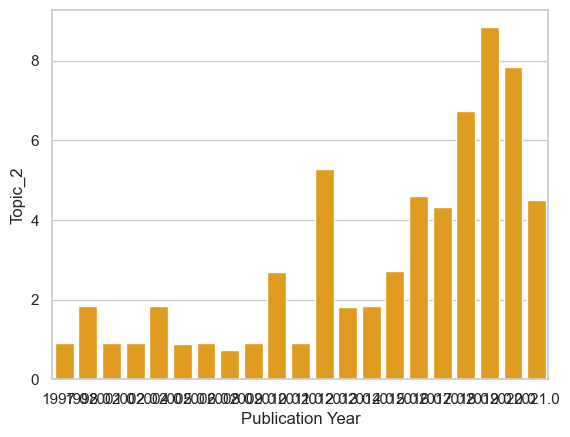

In [324]:
sns.barplot(x=topic_occurrence_by_year.index, y=topic_occurrence_by_year['Topic_2'], color='orange', label='Topic 2')

<AxesSubplot:xlabel='Publication Year', ylabel='Topic_3'>

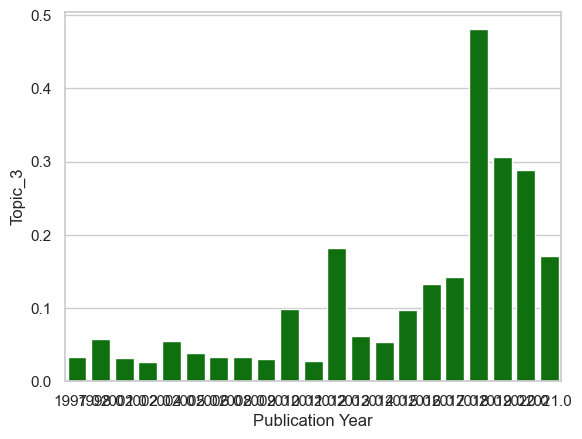

In [325]:
sns.barplot(x=topic_occurrence_by_year.index, y=topic_occurrence_by_year['Topic_3'], color='green', label='Topic 3')

<AxesSubplot:xlabel='Publication Year', ylabel='Topic_4'>

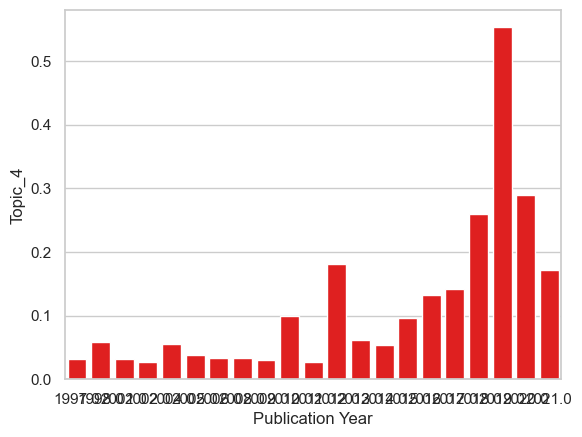

In [326]:
sns.barplot(x=topic_occurrence_by_year.index, y=topic_occurrence_by_year['Topic_4'], color='red', label='Topic 4')

In [327]:
sns.barplot(x=topic_occurrence_by_year.index, y=topic_occurrence_by_year['Topic_5'], color='purple', label='Topic 5')

KeyError: 'Topic_5'